<a href="https://colab.research.google.com/github/j23-cs167/project-2-everettwaechter/blob/main/Project2_Waechter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project #2
##Name: Everett Waechter

Proposed Points (out of 25):

# 1. Problem
State the problem you are trying to solve with this machine learning experiment. Include a description of the data, where you got the data, and what you're trying to predict..

I am using the KenPom NCAA men's basketball rankings for the week of January 19th, 2023. I got the data off of the Kenpom website and I am going to try and predict rank based on Adjusted offensive efficiency, Adjusted defensive efficiency, Adjusted .

# 2. Data Preparation
Explain your data preparation. What did you have to do to get your data in shape for your experiments? Why are you certain that you data is clean and prepared for use in your algorithms?

Pulling the data off the website was a bit of a pain in the ass so I used excel as I am familiar with it to copy and paste the data into a spreadsheet then I saved it as a CSV. This data set did not have any missing values so I did not have to mess with that. Also in Excel I was able to doublecheck that all my values that I want to use for my predictors and target are integers. 

In [1]:
# load and prepare your data here
import pandas
import numpy
from google.colab import drive
import pandas as pd
import sklearn
import pandas
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import neighbors
from sklearn.preprocessing import StandardScaler
drive.mount('/content/drive')

data = pandas.read_csv('/content/drive/My Drive/Colab Notebooks/Datasets/KenPom2023.csv')
data.head()

Mounted at /content/drive


,Rk,Team,Conf,W,L,AdjEM,AdjO,AdjO_rank,AdjD,AdjD_rank,...,Luck,Luck_rank,AdjEM.1,AdjEM_rank,OppO,OppO_rank,OppD,OppD_rank,NC_AdjEM,NC_AdjEM_rank
0,1,Houston,Amer,18,1,31.73,118.1,6,86.4,2,...,0.030,116,2.17,107,105.9,87,103.7,144,0.58,160
1,2,Tennessee,SEC,15,3,28.35,112.3,46,84.0,1,...,-0.017,216,4.67,58,106.1,73,101.4,50,1.85,117
2,3,UCLA,P12,17,2,28.18,116.8,12,88.6,5,...,-0.004,180,6.02,31,107.6,30,101.5,54,0.98,152
3,4,Alabama,SEC,16,2,27.03,116.6,13,89.5,7,...,0.060,71,9.62,3,108.6,11,99.0,3,8.30,12
4,5,Purdue,B10,18,1,26.30,119.6,3,93.3,18,...,0.016,145,5.81,36,106.8,49,101.0,40,1.14,147


# 3. Research

Put your code and your experiments here.

In [2]:
# code goes here... don't forget to include graphs. 
target= 'Rk'

predictors = ['Rk','W', 'L', 'AdjO', 'AdjO_rank', 'AdjD',
       'AdjD_rank', 'AdjT', 'AdjT_rank', 'Luck', 'Luck_rank', 'AdjEM.1',
       'AdjEM_rank', 'OppO', 'OppO_rank', 'OppD', 'OppD_rank', 'NC_AdjEM',
       'NC_AdjEM_rank']
train_data, test_data, train_sln, test_sln = train_test_split(data[predictors], data[target], test_size = 0.2, random_state=41)
train_data.head()

,Rk,W,L,AdjO,AdjO_rank,AdjD,AdjD_rank,AdjT,AdjT_rank,Luck,Luck_rank,AdjEM.1,AdjEM_rank,OppO,OppO_rank,OppD,OppD_rank,NC_AdjEM,NC_AdjEM_rank
237,238,8,10,100.9,242,106.8,228,63.8,335,0.122,15,1.90,118,106.5,58,104.5,194,-2.90,266
359,360,2,18,93.6,346,118.3,362,66.0,268,0.019,141,-1.20,220,104.3,175,105.5,257,1.76,122
357,358,1,15,90.9,356,114.0,343,67.2,208,-0.066,311,2.81,99,105.3,117,102.5,88,6.09,30
295,296,11,9,100.2,256,110.5,305,65.7,278,0.126,13,-2.24,257,103.5,224,105.8,273,3.93,68
349,350,7,12,94.5,342,112.6,334,67.5,187,-0.026,228,-6.70,350,100.5,348,107.2,334,-4.31,302


In [3]:
from sklearn.dummy import DummyRegressor
from sklearn import metrics


dummy_regr = DummyRegressor() 
dummy_regr.fit(train_data, train_sln)
preds = dummy_regr.predict(test_data)

print('MAE: ', metrics.mean_absolute_error(test_sln, preds))
print('MSE: ', metrics.mean_squared_error(test_sln, preds))
print('R2: ', metrics.r2_score(test_sln, preds))

MAE:  90.86150212564951
MSE:  10829.872176306746
R2:  -0.0013397865841056067


I ran a dummy regressor to get a baseline of my model. Clearly as a baseline the model is very ineffective.

In [4]:
#KNN
knn = neighbors.KNeighborsRegressor()
knn.fit(train_data, train_sln)

predictions1 = knn.predict(test_data)

print('MSE: ', metrics.mean_squared_error(test_sln, predictions1))
print('MAE: ', metrics.mean_absolute_error(test_sln, predictions1))
print('r2: ', metrics.r2_score(test_sln, predictions1))

MSE:  474.8904109589041
MAE:  17.378082191780816
r2:  0.9560912026458844


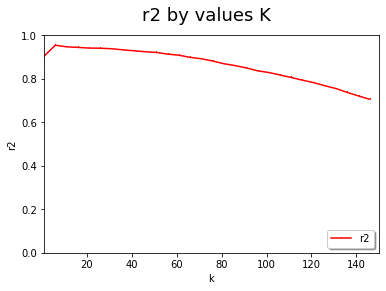

In [8]:
#graph
import matplotlib.pyplot as plt 
%matplotlib inline

r2_series1 = []

for i in range(1, 150, 5):
  knn = neighbors.KNeighborsRegressor(n_neighbors = i)
  knn.fit(train_data, train_sln)
  predictions1 = knn.predict(test_data)
  r2_series1.append(metrics.r2_score(test_sln, predictions1))

#plot it!
xvals = range(1, 150, 5)
plt.suptitle('r2 by values K', fontsize=18)
plt.xlabel('k')
plt.ylabel('r2')
plt.plot(xvals, r2_series1, 'r,-', label='r2')
plt.legend(loc='lower right', shadow=True)
plt.axis([1, 150, 0, 1])
plt.show()

In [19]:
#W-KNN
W_neigh = neighbors.KNeighborsRegressor(weights = 'distance')
W_neigh.fit(train_data, train_sln)
predictions4 = W_neigh.predict(test_data)

# use a metric to see how good our predictions are
print('MSE: ', metrics.mean_squared_error(test_sln, predictions4))
print('MAE: ', metrics.mean_absolute_error(test_sln, predictions4))
print('r2: ', metrics.r2_score(test_sln, predictions4))

MSE:  455.15863063411166
MAE:  16.89304649987181
r2:  0.9579156209194979


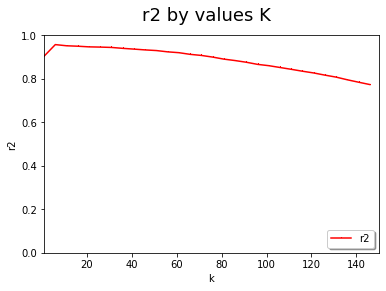

In [20]:
#graph
import matplotlib.pyplot as plt 
%matplotlib inline

r2_series2 = []

for i in range(1, 150, 5):
  W_neigh = neighbors.KNeighborsRegressor(weights = 'distance', n_neighbors = i)
  W_neigh.fit(train_data, train_sln)
  predictions4 = W_neigh.predict(test_data)
  r2_series2.append(metrics.r2_score(test_sln, predictions4))

#plot it!
xvals = range(1, 150, 5)
plt.suptitle('r2 by values K', fontsize=18)
plt.xlabel('k')
plt.ylabel('r2')
plt.plot(xvals, r2_series2, 'r,-', label='r2')
plt.legend(loc='lower right', shadow=True)
plt.axis([1, 150, 0, 1])
plt.show()

In [28]:
#Decision tree
dtr1 = tree.DecisionTreeRegressor(max_depth = 3)
dtr1.fit(train_data, train_sln)
dtr_preds1 = dtr1.predict(test_data)
dtr_1 = metrics.r2_score(dtr_preds1, test_sln)
print('R2 =', dtr_1)

R2 = 0.9803549226484134


[Text(0.5, 0.875, 'X[0] <= 185.0\nsquared_error = 11019.359\nsamples = 100.0%\nvalue = 181.234'),
 Text(0.25, 0.625, 'X[0] <= 93.5\nsquared_error = 2817.253\nsamples = 52.4%\nvalue = 94.724'),
 Text(0.125, 0.375, 'X[0] <= 48.5\nsquared_error = 777.094\nsamples = 25.5%\nvalue = 48.014'),
 Text(0.0625, 0.125, 'squared_error = 207.443\nsamples = 13.1%\nvalue = 24.368'),
 Text(0.1875, 0.125, 'squared_error = 165.305\nsamples = 12.4%\nvalue = 72.972'),
 Text(0.375, 0.375, 'X[0] <= 140.0\nsquared_error = 719.037\nsamples = 26.9%\nvalue = 139.038'),
 Text(0.3125, 0.125, 'squared_error = 181.677\nsamples = 13.8%\nvalue = 116.15'),
 Text(0.4375, 0.125, 'squared_error = 152.746\nsamples = 13.1%\nvalue = 163.132'),
 Text(0.75, 0.625, 'X[0] <= 271.0\nsquared_error = 2730.525\nsamples = 47.6%\nvalue = 276.522'),
 Text(0.625, 0.375, 'X[0] <= 224.5\nsquared_error = 596.474\nsamples = 21.0%\nvalue = 225.574'),
 Text(0.5625, 0.125, 'squared_error = 116.625\nsamples = 10.0%\nvalue = 203.172'),
 Text(0.6

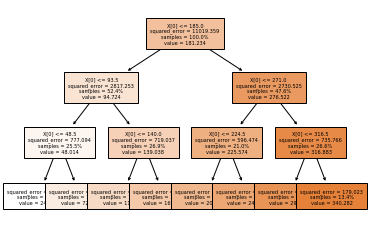

In [40]:
#graph
tree.plot_tree(dtr1.fit(train_data, train_sln), filled=True, proportion=True, fontsize=5)

In [46]:
#Random Forest

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn import ensemble
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import metrics

forest = ensemble.RandomForestRegressor(random_state = 0)
forest.fit(train_data, train_sln)
predictions7 = forest.predict(test_data)


print('MSE: ', metrics.mean_squared_error(test_sln, predictions7))
print('MAE: ', metrics.mean_absolute_error(test_sln, predictions7))
print('r2: ', metrics.r2_score(test_sln, predictions7))

MSE:  10.054794520547945
MAE:  2.5205479452054793
r2:  0.9990703245952081


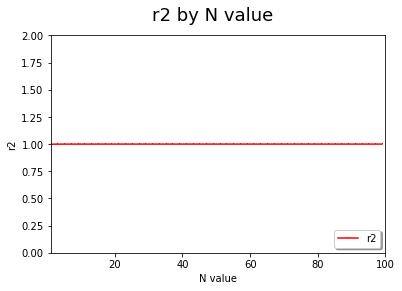

In [45]:
#graph
r2_series4 = []

for i in range(1, 100, 2):
  forest = ensemble.RandomForestRegressor(n_estimators = i)
  forest.fit(train_data, train_sln)
  predictions7 = forest.predict(test_data)
  r2_series4.append(metrics.r2_score(test_sln, predictions7))

#plot it!
xvals = range(1, 100, 2)
plt.suptitle('r2 by N value', fontsize=18)
plt.xlabel('N value')
plt.ylabel('r2')
plt.plot(xvals, r2_series4, 'r,-', label='r2')
plt.legend(loc='lower right', shadow=True)
plt.axis([1, 100, 0, 2])
plt.show()

#4. Analysis

What did you discover? What insights/recommendations do you have? What did you find that was interesting? Which model was your best model, which models didn't work well? Why do you think this is? In general, I want a discussion of your experiment, the results, and what they mean.

I discovered that the metrics used in the Kenpom rankings very accurately predict the rank which makes sense given the rankings are based on the metric. I played around with removing some of metrics to see if offense or defense predicted ranking and the models were all about equally effective in predicting ranking. Because of the nature of my dataset my model was always going to be a good predictor. My random forest was my best model which also makes sense just given how it works will optimize the model. None of my models did not work well with my worst model being my KNN which had a r2 of .96. Thus, overall the predictor variables in my model are very good predictors of ranking.

# 5. Bumps in the Road
What challenges did you encounter? How did you overcome these challenges?

For this project I did not run into too many issues, the one small struggle I had was with scraping the data from the internet, slightly transforming it (Changing a record in "Win-Loss" format to seperate win and loss columns), and converting it  to a CSV but it was relatively simple once I got it into excel formatted correctly.